In [1]:
!pip install git+https://github.com/facebookresearch/segment-anything.git

  Cloning https://github.com/facebookresearch/segment-anything.git to /tmp/pip-req-build-hus31wvh
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/segment-anything.git /tmp/pip-req-build-hus31wvh
  Resolved https://github.com/facebookresearch/segment-anything.git to commit 6fdee8f2727f4506cfbbe553e23b895e27956588
  Preparing metadata (setup.py) ... done
  Created wheel for segment-anything: filename=segment_anything-1.0-py3-none-any.whl size=36590 sha256=ad013080bedd7159a4707b9e670ec9414c4201da1de4448b4de803805dfe7d7c
  Stored in directory: /tmp/pip-ephem-wheel-cache-ypo_9egw/wheels/10/cf/59/9ccb2f0a1bcc81d4fbd0e501680b5d088d690c6cfbc02dc99d
Successfully built segment-anything


In [2]:
!wget https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth

--2024-07-15 14:12:48--  https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 108.157.254.124, 108.157.254.102, 108.157.254.15, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|108.157.254.124|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2564550879 (2.4G) [binary/octet-stream]
Saving to: ‘sam_vit_h_4b8939.pth’

sam_vit_h_4b8939.pt 100%[===================>]   2.39G   233MB/s    in 13s     

2024-07-15 14:13:02 (184 MB/s) - ‘sam_vit_h_4b8939.pth’ saved [2564550879/2564550879]



In [3]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os

from segment_anything import SamAutomaticMaskGenerator, sam_model_registry

default='input/image_4.jpg'


In [4]:
def show_anns(anns):
   if len(anns) == 0:
       return
   sorted_anns = sorted(anns, key=(lambda x: x['area']), reverse=True)
   ax = plt.gca()
   ax.set_autoscale_on(False)
   for ann in sorted_anns:
       m = ann['segmentation']
       img = np.ones((m.shape[0], m.shape[1], 3))
       color_mask = np.random.random((1, 3)).tolist()[0]
       for i in range(3):
           img[:,:,i] = color_mask[i]
       np.dstack((img, m*0.35))
       ax.imshow(np.dstack((img, m*0.35)))

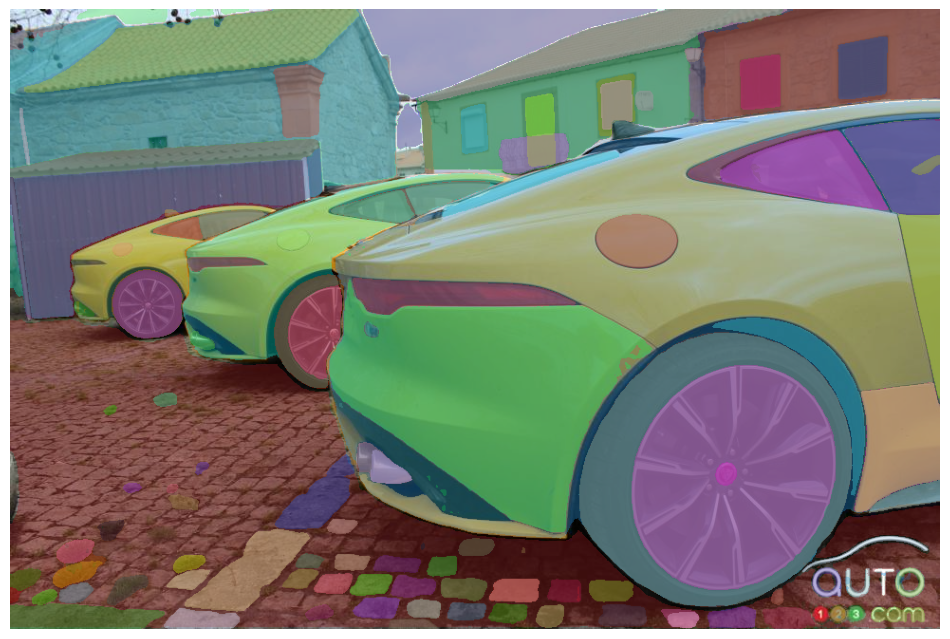

In [7]:
sam = sam_model_registry["vit_h"](checkpoint="/content/sam_vit_h_4b8939.pth")
sam.cuda()
mask_generator = SamAutomaticMaskGenerator(sam)

image_path = '/content/jaguarinput.JPG'
image_name = image_path.split(os.path.sep)[-1]
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
masks = mask_generator.generate(image)
plt.figure(figsize=(12, 9))
plt.imshow(image)
show_anns(masks)
plt.axis('off')
plt.savefig(image_name, bbox_inches='tight')